# PyTorch vs TensorFlow: 

Why PyTorch is generally your best option ?

## Open source models

![](https://www.assemblyai.com/blog/content/images/2023/01/num_hf_models_2023.png)
![](https://www.assemblyai.com/blog/content/images/2023/01/num_top_models_2023.png)

## Research papers

![](https://www.assemblyai.com/blog/content/images/2021/12/Fraction-of-Papers-Using-PyTorch-vs.-TensorFlow.png)

## Papers with code

![](https://www.assemblyai.com/blog/content/images/2023/01/percentage_repo_2023.png)

## Exception

If you do on-edge computing (phones for example) TensorFlow or ONNX have a better  deployment toolkit

# Hands on !

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Working with data

In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


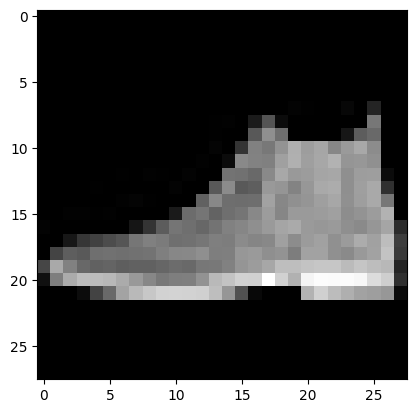

In [30]:
for X, y in test_dataloader:
	ax = plt.gca()
	image = X[0].numpy().transpose((1, 2, 0))
	ax.imshow(image, cmap="gray")
	break

## Creating Models

In [5]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Optimizing the Model Parameters

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [7]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [8]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [9]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301437  [   64/60000]
loss: 2.290586  [ 6464/60000]
loss: 2.276067  [12864/60000]
loss: 2.272380  [19264/60000]
loss: 2.241445  [25664/60000]
loss: 2.226152  [32064/60000]
loss: 2.221728  [38464/60000]
loss: 2.190643  [44864/60000]
loss: 2.194218  [51264/60000]
loss: 2.155982  [57664/60000]
Test Error: 
 Accuracy: 48.6%, Avg loss: 2.153913 

Epoch 2
-------------------------------
loss: 2.165284  [   64/60000]
loss: 2.150076  [ 6464/60000]
loss: 2.096495  [12864/60000]
loss: 2.108741  [19264/60000]
loss: 2.050162  [25664/60000]
loss: 2.007014  [32064/60000]
loss: 2.011863  [38464/60000]
loss: 1.941247  [44864/60000]
loss: 1.947528  [51264/60000]
loss: 1.861308  [57664/60000]
Test Error: 
 Accuracy: 59.3%, Avg loss: 1.869112 

Epoch 3
-------------------------------
loss: 1.906096  [   64/60000]
loss: 1.868446  [ 6464/60000]
loss: 1.754439  [12864/60000]
loss: 1.785920  [19264/60000]
loss: 1.686961  [25664/60000]
loss: 1.651917  [32064/600

## Saving Models

In [10]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Loading Models

In [11]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("data/model.pth"))

<All keys matched successfully>

Predicted: "Sneaker", Actual: "Sneaker"


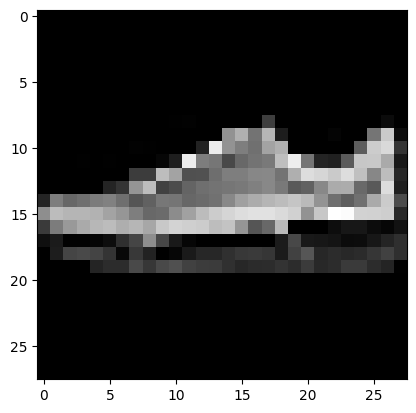

In [34]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[9][0], test_data[9][1]

ax = plt.gca()
image = x.numpy().transpose((1, 2, 0))
ax.imshow(image, cmap="gray")

with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')